In [4]:
# Seperating Cabins into Decks and Cabin Numbers, Handling Missing Values, and Mapping Deck Letters to Numerical Values to later use in Machine Learning Models
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Split the 'Cabin' column into multiple cabins
df['Cabin'] = df['Cabin'].str.split()

# Explode the 'Cabin' column to create separate rows for each cabin
df = df.explode('Cabin').reset_index(drop=True)

# Extract the deck letters from the Cabin column
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')

# Extract the numerical part of the cabin (assuming it's always after the deck letter)
df['Cabin_Num'] = df['Cabin'].str.extract(r'(\d+)')

# Replace missing values with a placeholder (e.g., 0) for numerical part of the cabin
df['Cabin_Num'].fillna(0, inplace=True)
df['Cabin_Num'] = df['Cabin_Num'].astype(int)

# Replace missing values for the deck letter with 'Unknown'
df['Deck'].fillna('Unknown', inplace=True)

# Map each deck letter to a numerical value, have missing values as NaN
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'Unknown': None}

# Create a new numerical column representing the deck values
df['Deck_Num'] = df['Deck'].map(deck_mapping)

# Show the DataFrame 
print(df[['PassengerId', 'Cabin', 'Deck', 'Cabin_Num', 'Deck_Num']].head(50))

    PassengerId Cabin     Deck  Cabin_Num  Deck_Num
0             1   NaN  Unknown          0       NaN
1             2   C85        C         85       3.0
2             3   NaN  Unknown          0       NaN
3             4  C123        C        123       3.0
4             5   NaN  Unknown          0       NaN
5             6   NaN  Unknown          0       NaN
6             7   E46        E         46       5.0
7             8   NaN  Unknown          0       NaN
8             9   NaN  Unknown          0       NaN
9            10   NaN  Unknown          0       NaN
10           11    G6        G          6       7.0
11           12  C103        C        103       3.0
12           13   NaN  Unknown          0       NaN
13           14   NaN  Unknown          0       NaN
14           15   NaN  Unknown          0       NaN
15           16   NaN  Unknown          0       NaN
16           17   NaN  Unknown          0       NaN
17           18   NaN  Unknown          0       NaN
18          

In [5]:
def map_deck(deck_letter):
    deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'Unknown': 0}
    return deck_mapping.get(deck_letter, 0)

# Extract deck letters from Cabin column and fill missing values with 'Unknown'
deck_letters = df['Cabin'].str.extract(r'([A-Za-z])').fillna('Unknown')

# Convert deck letters to numbers using the map_deck function
deck_nums = deck_letters.applymap(map_deck)

# Add Deck_Num column to the DataFrame
df['Deck_Num'] = deck_nums

# Show the result
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

C:\Users\kater\AppData\Local\Temp\ipykernel_8844\4084955363.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  deck_nums = deck_letters.applymap(map_deck)


In [10]:
# Seperaing Embarked into the 3 areas and mapping them to numerical values, and handling missing values
# Map each Embarked value to a numerical value
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}

# Replace missing values for the Embarked column with 'Unknown'
df['Embarked'].fillna('Unknown', inplace=True)
# Create a new numerical column representing the Embarked values
df['Embarked_Num'] = df['Embarked'].map(embarked_mapping)

# Show the result
print(df[['PassengerId', 'Embarked', 'Embarked_Num']].head(10))

   PassengerId Embarked  Embarked_Num
0            1        S           3.0
1            2        C           1.0
2            3        S           3.0
3            4        S           3.0
4            5        S           3.0
5            6        Q           2.0
6            7        S           3.0
7            8        S           3.0
8            9        S           3.0
9           10        C           1.0


Number of unique tickets: 681
Ticket_Prefix
PC            60
C.A.          27
A/            23
STON/O        18
W./C.          9
CA.            8
SOTON/O.Q.     8
SOTON/OQ       7
CA             6
C              5
F.C.C.         5
S.O.C.         5
SC/PARIS       5
SC/Paris       4
LINE           4
SC/AH          3
S.O./P.P.      3
PP             3
P/PP           2
A.             2
WE/P           2
SOTON/O        2
S.C./PARIS     2
A./            2
S.W./PP        1
F.C.           1
A/S            1
SC             1
S.O.P.         1
SCO/W          1
SW/PP          1
W/C            1
Fa             1
A              1
W.E.P.         1
SO/C           1
S.P.           1
S.C./A.        1
C.A./SOTON     1
Name: count, dtype: int64
count    8.870000e+02
mean     2.278464e+05
std      5.024506e+05
min      2.000000e+00
25%      1.177250e+04
50%      1.104130e+05
75%      3.470625e+05
max      3.101317e+06
Name: Ticket_Number, dtype: float64


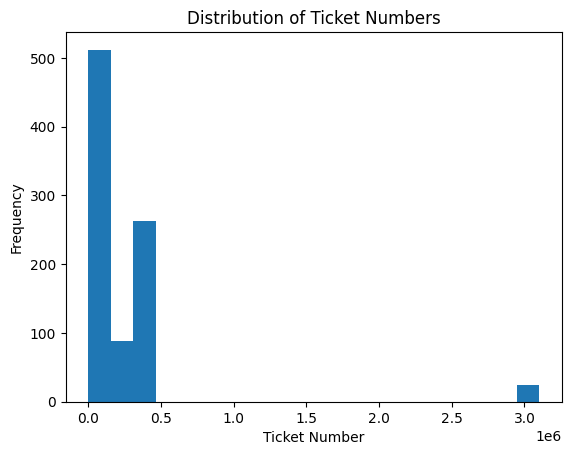

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Explore unique ticket values
unique_tickets = df['Ticket'].unique()
print("Number of unique tickets:", len(unique_tickets))

# Extract ticket prefixes
df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z\.\/]+)')
print(df['Ticket_Prefix'].value_counts())

# Extract ticket numbers
df['Ticket_Number'] = df['Ticket'].str.extract(r'(\d+)')
df['Ticket_Number'] = df['Ticket_Number'].astype(float)  # Convert to float to handle NaN values

# Analyze ticket numbers
print(df['Ticket_Number'].describe())

# Visualize ticket numbers
import matplotlib.pyplot as plt
plt.hist(df['Ticket_Number'].dropna(), bins=20)
plt.xlabel('Ticket Number')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Numbers')
plt.show()